# Exploratory Data Analysis (EDA)

This notebook contains the exploratory data analysis (EDA) process for the dataset. All explanations of EDA have been removed for clarity and simplicity, and the content is now presented in English.

# Lab 5 : Exploratory Data Analysis

## Use Huggingface to download the dataset 🤗.

In [1]:
import ast
import shutil
from pathlib import Path

import matplotlib.pyplot as plt
import pandas as pd
from matplotlib import font_manager, rcParams

In [2]:
!hf download celesca/election_results_2569 --repo-type dataset --local-dir ./

Fetching 4 files: 100%|███████████████████████████| 4/4 [00:02<00:00,  1.83it/s]
Download complete: 100%|██████████████████████| 818k/818k [00:02<00:00, 373kB/s]/Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda
Download complete: 100%|██████████████████████| 818k/818k [00:02<00:00, 372kB/s]


In [3]:
!unzip -q ./data.zip

checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ��� 1/.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ��� 1/constituency_candidates.csv.
checkdir error:  cannot create /Users/beam/Workspace/Course/my-cpe-lab/Y2/CPE232/sessions/05_eda/all_constituency/�+����--ʦ�+
                 Illegal byte sequence
                 unable to process all_constituency/�+����--ʦ�+/�+����--ʦ�+ ���

In [4]:
data_dir = Path("data")
data_dir.mkdir(exist_ok=True)

data_folders = ["all_constituency", "area", "party", "partylist", "referendum", "seat", "winner"]

for folder in data_folders:
    folder_path = Path(folder)
    if folder_path.exists():
        for csv_file in folder_path.glob("*.csv"):
            shutil.copy(csv_file, data_dir / csv_file.name)
            print(f"Copied {csv_file.name} to data/")

Copied areas.csv to data/
Copied partyStandings.csv to data/
Copied party_list_top2.csv to data/
Copied map.csv to data/
Copied seat500.csv to data/
Copied winner.csv to data/


In [5]:
for folder in data_folders:
    folder_path = Path(folder)
    if folder_path.exists():
        shutil.rmtree(folder_path)
        print(f"Removed {folder} directory")

if Path("data.zip").exists():
    Path("data.zip").unlink()
    print("Removed data.zip")

print("\nCSV files are now in the 'data/' directory")


Removed all_constituency directory
Removed area directory
Removed party directory
Removed partylist directory
Removed referendum directory
Removed seat directory
Removed winner directory
Removed data.zip

CSV files are now in the 'data/' directory


## Thai Font in Matplotlib

Download Thai font and place it in your working directory.

In [6]:
font_path = "THSarabunNew.ttf"

In [7]:
font_path = "THSarabunNew.ttf"
font_manager.fontManager.addfont(font_path)
rcParams["font.family"] = "TH Sarabun New"
thai_font = font_manager.FontProperties(fname=font_path)

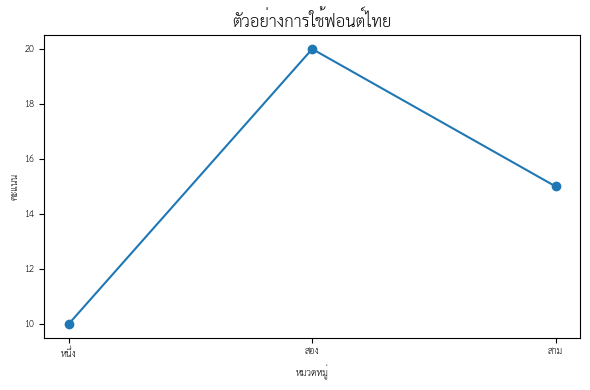

In [8]:
plt.figure(figsize=(6, 4))
plt.title("ตัวอย่างการใช้ฟอนต์ไทย", fontproperties=thai_font, fontsize=18)
plt.xlabel("หมวดหมู่", fontproperties=thai_font)
plt.ylabel("คะแนน", fontproperties=thai_font)

plt.plot([1, 2, 3], [10, 20, 15], marker="o")
plt.xticks([1, 2, 3], ["หนึ่ง", "สอง", "สาม"], fontproperties=thai_font)
plt.yticks(fontproperties=thai_font)

plt.tight_layout()
plt.show()

# Context

## 2026 Thai General Election

The 2026 Thai general election was held on 8 February 2026 to choose members of Thailand’s House of Representatives. The election was triggered after the House of Representatives was dissolved on 12 December 2025. All 500 seats in the House were up for election.

The electoral system used two methods:
- 400 seats elected from constituencies.
- 100 seats allocated by party-list proportional representation.

The election was held alongside a referendum to decide whether to begin drafting a new constitution to replace the current 2017 charter.

# EDA

## Data understanding

- `winner`: constituency election results. Each row is one constituency winner, with party and vote summary fields.
- `party_standings`: overall party standings. Each row is one party with total votes and seat counts.
- `seat500`: 500-seat allocation table. Each row is one seat record linked to a party code.
- `party_list_top2`: top-2 party-list result per constituency. Each row is one constituency with the top two parties and vote shares.
- `map_data`: map-ready referendum and geography fields. Each row is one constituency area used for mapping.

### Unit of analysis

- `winner`: constituency-level.
- `party_standings`: party-level.
- `seat500`: seat-level.
- `party_list_top2`: constituency-level.
- `map_data`: constituency-level (and can be grouped to province-level by `provinceName`).

### Key IDs and join keys

- `id`: primary row identifier in each table, but meaning changes by table (party ID in `party_standings`, constituency ID in `winner`, `party_list_top2`, and `map_data`).
- `partyCode`: party key in `seat500`.
- `provinceName`: geographic key for province-level grouping and joins.
- Party joins: use `party_standings.id` ↔ `seat500.partyCode`; in `winner`, the winner party code is stored in `partyWinner`.

# Data quality checks

In [9]:
data_dir = Path("data")
file_map = {
    "winner": "winner.csv",
    "party_standings": "partyStandings.csv",
    "seat500": "seat500.csv",
    "party_list_top2": "party_list_top2.csv",
    "map_data": "map.csv",
}

dfs = {name: pd.read_csv(data_dir / file_name) for name, file_name in file_map.items()}

overview = pd.DataFrame(
    [{"table": name, "rows": frame.shape[0], "cols": frame.shape[1]} for name, frame in dfs.items()]
)
overview

,table,rows,cols
0,winner,400,8
1,party_standings,60,8
2,seat500,500,7
3,party_list_top2,400,7
4,map_data,400,7


In [10]:
missing_by_table = []
missing_by_column = []

for table_name, frame in dfs.items():
    missing_count = frame.isna().sum()
    missing_pct = frame.isna().mean().mul(100)

    missing_by_table.append(
        {
            "table": table_name,
            "rows": len(frame),
            "total_missing_cells": int(missing_count.sum()),
            "missing_cell_pct": round(frame.isna().mean().mean() * 100, 2),
        }
    )

    for column in frame.columns:
        missing_by_column.append(
            {
                "table": table_name,
                "column": column,
                "missing_count": int(missing_count[column]),
                "missing_pct": round(float(missing_pct[column]), 2),
            }
        )

pd.DataFrame(missing_by_table).sort_values("total_missing_cells", ascending=False)

,table,rows,total_missing_cells,missing_cell_pct
0,winner,400,0,0.0
1,party_standings,60,0,0.0
2,seat500,500,0,0.0
3,party_list_top2,400,0,0.0
4,map_data,400,0,0.0


In [11]:
missing_columns_df = pd.DataFrame(missing_by_column)
missing_columns_df = missing_columns_df.sort_values(
    ["table", "missing_count", "missing_pct"],
    ascending=[True, False, False],
)
missing_columns_df

,table,column,missing_count,missing_pct
30,map_data,id,0,0.0
31,map_data,name,0,0.0
32,map_data,provinceId,0,0.0
33,map_data,number,0,0.0
34,map_data,provinceName,0,0.0
35,map_data,referendums,0,0.0
36,map_data,provinceId_key,0,0.0
23,party_list_top2,id,0,0.0
24,party_list_top2,name,0,0.0
25,party_list_top2,provinceId,0,0.0


In [12]:
id_column_map = {
    "winner": "id",
    "party_standings": "id",
    "seat500": "index",
    "party_list_top2": "id",
    "map_data": "id",
}

duplicate_rows = []
for table_name, frame in dfs.items():
    id_column = id_column_map.get(table_name)
    duplicate_rows.append(
        {
            "table": table_name,
            "duplicate_rows": int(frame.duplicated().sum()),
            "id_column": id_column,
            "duplicate_ids": int(frame.duplicated(subset=[id_column]).sum())
            if id_column in frame.columns
            else None,
        }
    )

pd.DataFrame(duplicate_rows).sort_values("duplicate_rows", ascending=False)

,table,duplicate_rows,id_column,duplicate_ids
0,winner,0,id,0
1,party_standings,0,id,0
2,seat500,0,index,0
3,party_list_top2,0,id,0
4,map_data,0,id,0


In [13]:
json_targets = {
    "winner": "candidates",
    "party_list_top2": "parties",
    "map_data": "referendums",
}


def try_parse_json_like(value):
    if pd.isna(value):
        return None, False
    if isinstance(value, (list, dict)):
        return value, True
    try:
        return ast.literal_eval(str(value)), True
    except (ValueError, SyntaxError):
        return None, False


parse_rows = []
for table_name, column_name in json_targets.items():
    frame = dfs[table_name]
    series = frame[column_name]

    non_null = series.notna().sum()
    parse_ok = series.apply(lambda x: try_parse_json_like(x)[1]).sum()
    parse_fail = int(non_null - parse_ok)

    parse_rows.append(
        {
            "table": table_name,
            "column": column_name,
            "rows": len(series),
            "non_null_rows": int(non_null),
            "parse_fail_rows": parse_fail,
            "parse_fail_pct_of_non_null": round((parse_fail / non_null) * 100, 2)
            if non_null
            else 0.0,
        }
    )

pd.DataFrame(parse_rows)

,table,column,rows,non_null_rows,parse_fail_rows,parse_fail_pct_of_non_null
0,winner,candidates,400,400,0,0.0
1,party_list_top2,parties,400,400,0,0.0
2,map_data,referendums,400,400,0,0.0


In [14]:
numeric_like_rows = []
threshold = 0.8

for table_name, frame in dfs.items():
    for column in frame.columns:
        if frame[column].dtype != "object":
            continue

        raw = frame[column]
        non_null = raw.dropna().astype(str).str.strip()
        non_empty = non_null[non_null != ""]

        if len(non_empty) == 0:
            continue

        cleaned = non_empty.str.replace(",", "", regex=False)
        parsed = pd.to_numeric(cleaned, errors="coerce")
        numeric_ratio = parsed.notna().mean()

        if numeric_ratio >= threshold:
            numeric_like_rows.append(
                {
                    "table": table_name,
                    "column": column,
                    "dtype": str(frame[column].dtype),
                    "non_empty_rows": int(len(non_empty)),
                    "numeric_like_ratio": round(float(numeric_ratio), 3),
                }
            )

pd.DataFrame(numeric_like_rows).sort_values(
    ["numeric_like_ratio", "table", "column"],
    ascending=[False, True, True],
) if numeric_like_rows else pd.DataFrame(
    columns=["table", "column", "dtype", "non_empty_rows", "numeric_like_ratio"]
)

,table,column,dtype,non_empty_rows,numeric_like_ratio


In [15]:
party_name_sources = {
    "party_standings.partyName": set(
        dfs["party_standings"]["partyName"].dropna().astype(str).str.strip()
    ),
    "seat500.partyName": set(dfs["seat500"]["partyName"].dropna().astype(str).str.strip()),
}

winner_party_names = set()
for raw in dfs["winner"]["candidates"].dropna():
    parsed, ok = try_parse_json_like(raw)
    if not ok or not isinstance(parsed, list):
        continue
    for item in parsed:
        if isinstance(item, dict):
            party = item.get("party")
            if isinstance(party, dict) and party.get("name"):
                winner_party_names.add(str(party["name"]).strip())

party_list_names = set()
for raw in dfs["party_list_top2"]["parties"].dropna():
    parsed, ok = try_parse_json_like(raw)
    if not ok or not isinstance(parsed, list):
        continue
    for item in parsed:
        if isinstance(item, dict):
            name = item.get("name")
            if name:
                party_list_names.add(str(name).strip())

party_name_sources["winner.candidates.party.name"] = winner_party_names
party_name_sources["party_list_top2.parties.name"] = party_list_names

all_party_names = sorted(set().union(*party_name_sources.values()))
presence_df = pd.DataFrame({"partyName": all_party_names})
for source_name, names in party_name_sources.items():
    presence_df[source_name] = presence_df["partyName"].isin(names)

presence_df[presence_df.drop(columns=["partyName"]).sum(axis=1) < len(party_name_sources)]

,partyName,party_standings.partyName,seat500.partyName,winner.candidates.party.name,party_list_top2.parties.name
0,พรรคกรีน,True,False,False,False
2,พรรคก้าวอิสระ,True,False,False,False
3,พรรคครูไทยเพื่อประชาชน,True,False,False,False
4,พรรคคลองไทย,True,False,False,False
5,พรรคความหวังใหม่,True,False,False,False
6,พรรคทางเลือกใหม่,True,True,False,False
7,พรรคท้องที่ไทย,True,False,False,False
8,พรรคประชากรไทย,True,False,False,False
12,พรรคประชาธิปไตยใหม่,True,True,False,False
13,พรรคประชาอาสาชาติ,True,False,False,False


## Descriptive election profile

In [16]:
winner_frame = dfs["winner"].copy()
party_frame = dfs["party_standings"].copy()
party_list_frame = dfs["party_list_top2"].copy()
map_frame = dfs["map_data"].copy()


def to_records(value):
    parsed, ok = try_parse_json_like(value)
    if ok and isinstance(parsed, list):
        return parsed
    return []


winner_rows = []
for _, row in winner_frame.iterrows():
    candidates = to_records(row.get("candidates"))
    candidate_rows = []
    for candidate in candidates:
        if not isinstance(candidate, dict):
            continue
        candidate_rows.append(
            {
                "rank": candidate.get("rank"),
                "totalVotes": candidate.get("totalVotes"),
                "percent": candidate.get("percent"),
            }
        )

    candidate_df = pd.DataFrame(candidate_rows)
    if candidate_df.empty:
        winner_rows.append(
            {
                "id": row.get("id"),
                "provinceName": row.get("provinceName"),
                "winner_votes": pd.NA,
                "winner_percent": pd.NA,
                "runner_up_votes": pd.NA,
                "runner_up_percent": pd.NA,
                "vote_margin_votes": pd.NA,
                "vote_margin_pct_points": pd.NA,
                "constituency_total_votes": pd.NA,
            }
        )
        continue

    candidate_df["totalVotes"] = pd.to_numeric(candidate_df["totalVotes"], errors="coerce")
    candidate_df["percent"] = pd.to_numeric(candidate_df["percent"], errors="coerce")
    candidate_df["rank"] = pd.to_numeric(candidate_df["rank"], errors="coerce")

    ranked = candidate_df.dropna(subset=["rank"]).sort_values("rank")
    if ranked.empty:
        ranked = candidate_df.sort_values("totalVotes", ascending=False)

    winner_candidate = ranked.iloc[0] if len(ranked) >= 1 else pd.Series(dtype="object")
    runner_candidate = ranked.iloc[1] if len(ranked) >= 2 else pd.Series(dtype="object")

    winner_votes = pd.to_numeric(winner_candidate.get("totalVotes"), errors="coerce")
    winner_percent = pd.to_numeric(winner_candidate.get("percent"), errors="coerce")
    runner_votes = pd.to_numeric(runner_candidate.get("totalVotes"), errors="coerce")
    runner_percent = pd.to_numeric(runner_candidate.get("percent"), errors="coerce")

    winner_rows.append(
        {
            "id": row.get("id"),
            "provinceName": row.get("provinceName"),
            "winner_votes": winner_votes,
            "winner_percent": winner_percent,
            "runner_up_votes": runner_votes,
            "runner_up_percent": runner_percent,
            "vote_margin_votes": winner_votes - runner_votes,
            "vote_margin_pct_points": winner_percent - runner_percent,
            "constituency_total_votes": candidate_df["totalVotes"].sum(min_count=1),
        }
    )

winner_profile = pd.DataFrame(winner_rows)

partylist_rows = []
for _, row in party_list_frame.iterrows():
    parties = to_records(row.get("parties"))
    party_rows = []
    for party in parties:
        if not isinstance(party, dict):
            continue
        party_rows.append(
            {
                "rank": party.get("rank"),
                "totalVotes": party.get("totalVotes"),
                "percent": party.get("percent"),
            }
        )

    party_df = pd.DataFrame(party_rows)
    if party_df.empty:
        partylist_rows.append(
            {
                "id": row.get("id"),
                "partylist_margin_votes": pd.NA,
                "partylist_margin_pct_points": pd.NA,
            }
        )
        continue

    party_df["totalVotes"] = pd.to_numeric(party_df["totalVotes"], errors="coerce")
    party_df["percent"] = pd.to_numeric(party_df["percent"], errors="coerce")
    party_df["rank"] = pd.to_numeric(party_df["rank"], errors="coerce")

    ranked = party_df.dropna(subset=["rank"]).sort_values("rank")
    if ranked.empty:
        ranked = party_df.sort_values("totalVotes", ascending=False)

    top1 = ranked.iloc[0] if len(ranked) >= 1 else pd.Series(dtype="object")
    top2 = ranked.iloc[1] if len(ranked) >= 2 else pd.Series(dtype="object")

    top1_votes = pd.to_numeric(top1.get("totalVotes"), errors="coerce")
    top2_votes = pd.to_numeric(top2.get("totalVotes"), errors="coerce")
    top1_percent = pd.to_numeric(top1.get("percent"), errors="coerce")
    top2_percent = pd.to_numeric(top2.get("percent"), errors="coerce")

    partylist_rows.append(
        {
            "id": row.get("id"),
            "partylist_margin_votes": top1_votes - top2_votes,
            "partylist_margin_pct_points": top1_percent - top2_percent,
        }
    )

partylist_margin_profile = pd.DataFrame(partylist_rows)
referendum_votes = []
for raw in map_frame["referendums"].dropna():
    referendums = to_records(raw)
    for ref in referendums:
        if isinstance(ref, dict):
            referendum_votes.append(pd.to_numeric(ref.get("totalVote"), errors="coerce"))

referendum_total_votes = pd.Series(referendum_votes, dtype="float64").sum(min_count=1)
winner_profile.head()

,id,provinceName,winner_votes,winner_percent,runner_up_votes,runner_up_percent,vote_margin_votes,vote_margin_pct_points,constituency_total_votes
0,26b4aad6-94b3-490a-9390-71636d5e97a4,กรุงเทพมหานคร,32564.0,44.39,14018.0,19.11,18546.0,25.28,60243
1,a4b95b52-2371-4a3e-bc51-6b3381578720,กรุงเทพมหานคร,37055.0,47.08,15002.0,19.06,22053.0,28.02,65677
2,be7ff60c-305b-47b8-a8b6-dd699e5f5d6c,กรุงเทพมหานคร,32753.0,45.07,18263.0,25.13,14490.0,19.94,60727
3,8d1c14af-dbec-46bd-ba6d-b605490e385a,กรุงเทพมหานคร,30477.0,43.33,21776.0,30.96,8701.0,12.37,61994
4,380c6e8c-51e2-4acc-8e3f-7772bdf18ae8,กรุงเทพมหานคร,43394.0,50.07,21113.0,24.36,22281.0,25.71,74085


In [17]:
seat_total_from_rows = int(len(dfs["seat500"]))
seat_total_from_party = pd.to_numeric(party_frame["totalSeats"], errors="coerce").sum(min_count=1)
constituency_seats = pd.to_numeric(party_frame["constituencySeats"], errors="coerce").sum(
    min_count=1
)
party_list_seats = pd.to_numeric(party_frame["partyListSeats"], errors="coerce").sum(min_count=1)

constituency_votes_total = pd.to_numeric(
    party_frame["totalConstituencyVotes"], errors="coerce"
).sum(min_count=1)
party_list_votes_total = pd.to_numeric(party_frame["totalPartyListVotes"], errors="coerce").sum(
    min_count=1
)
combined_votes_total = constituency_votes_total + party_list_votes_total

winner_constituency_votes_total = pd.to_numeric(
    winner_profile["constituency_total_votes"], errors="coerce"
).sum(min_count=1)

totals_table = pd.DataFrame(
    [
        {"metric": "Total seats (seat500 rows)", "value": seat_total_from_rows},
        {"metric": "Total seats (party standings sum)", "value": seat_total_from_party},
        {"metric": "Constituency seats total", "value": constituency_seats},
        {"metric": "Party-list seats total", "value": party_list_seats},
        {"metric": "Constituency votes total (party standings)", "value": constituency_votes_total},
        {"metric": "Party-list votes total (party standings)", "value": party_list_votes_total},
        {"metric": "Combined votes total", "value": combined_votes_total},
        {
            "metric": "Constituency ballots from winner.candidates (sum)",
            "value": winner_constituency_votes_total,
        },
        {"metric": "Referendum total votes (map.referendums)", "value": referendum_total_votes},
    ]
)

totals_table

,metric,value
0,Total seats (seat500 rows),500.0
1,Total seats (party standings sum),500.0
2,Constituency seats total,400.0
3,Party-list seats total,100.0
4,Constituency votes total (party standings),31874109.0
5,Party-list votes total (party standings),31927648.0
6,Combined votes total,63801757.0
7,Constituency ballots from winner.candidates (sum),28602136.0
8,Referendum total votes (map.referendums),33354794.0


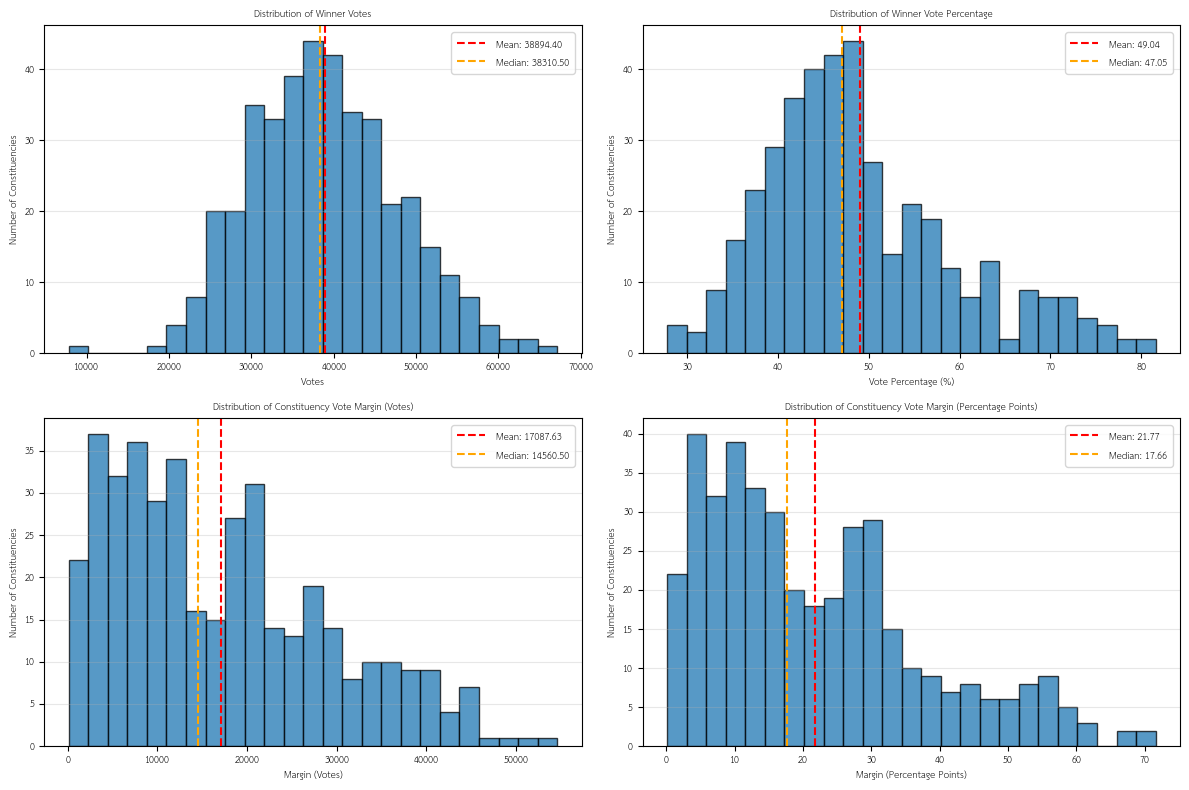

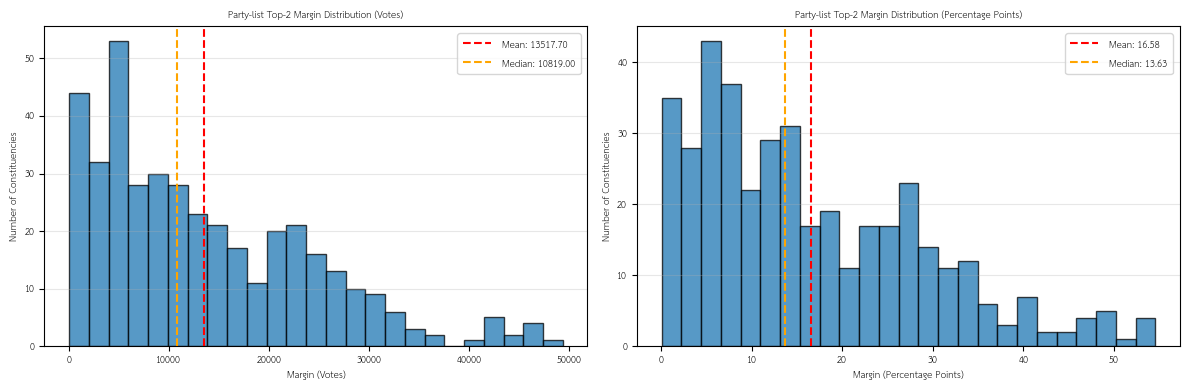

In [18]:
distribution_columns = [
    "winner_votes",
    "winner_percent",
    "vote_margin_votes",
    "vote_margin_pct_points",
]

distribution_summary = (
    winner_profile[distribution_columns]
    .apply(pd.to_numeric, errors="coerce")
    .describe(percentiles=[0.1, 0.25, 0.5, 0.75, 0.9])
    .T
)
distribution_summary

title_map = {
    "winner_votes": "Distribution of Winner Votes",
    "winner_percent": "Distribution of Winner Vote Percentage",
    "vote_margin_votes": "Distribution of Constituency Vote Margin (Votes)",
    "vote_margin_pct_points": "Distribution of Constituency Vote Margin (Percentage Points)",
}
xlabel_map = {
    "winner_votes": "Votes",
    "winner_percent": "Vote Percentage (%)",
    "vote_margin_votes": "Margin (Votes)",
    "vote_margin_pct_points": "Margin (Percentage Points)",
}

fig, axes = plt.subplots(2, 2, figsize=(12, 8))
for idx, column in enumerate(distribution_columns):
    ax = axes[idx // 2, idx % 2]
    series = pd.to_numeric(winner_profile[column], errors="coerce").dropna()
    ax.hist(series, bins=25, alpha=0.75, edgecolor="black")
    ax.axvline(
        series.mean(),
        color="red",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean: {series.mean():.2f}",
    )
    ax.axvline(
        series.median(),
        color="orange",
        linestyle="--",
        linewidth=1.5,
        label=f"Median: {series.median():.2f}",
    )
    ax.set_title(title_map[column], fontproperties=thai_font)
    ax.set_xlabel(xlabel_map[column], fontproperties=thai_font)
    ax.set_ylabel("Number of Constituencies", fontproperties=thai_font)
    ax.grid(axis="y", alpha=0.3)
    ax.legend(prop=thai_font)

plt.tight_layout()
plt.show()

partylist_margin_numeric = partylist_margin_profile[
    ["partylist_margin_votes", "partylist_margin_pct_points"]
].apply(pd.to_numeric, errors="coerce")

partylist_margin_summary = partylist_margin_numeric.describe(
    percentiles=[0.1, 0.25, 0.5, 0.75, 0.9]
).T
partylist_margin_summary["mean"] = partylist_margin_numeric.mean()
partylist_margin_summary["median"] = partylist_margin_numeric.median()
partylist_margin_summary["std"] = partylist_margin_numeric.std()
partylist_margin_summary["iqr"] = partylist_margin_summary["75%"] - partylist_margin_summary["25%"]
partylist_margin_summary = partylist_margin_summary[
    [
        "count",
        "mean",
        "median",
        "std",
        "min",
        "10%",
        "25%",
        "50%",
        "75%",
        "90%",
        "max",
        "iqr",
    ]
]
partylist_margin_summary

fig, axes = plt.subplots(1, 2, figsize=(12, 4))
margin_plot_columns = ["partylist_margin_votes", "partylist_margin_pct_points"]
margin_title_map = {
    "partylist_margin_votes": "Party-list Top-2 Margin Distribution (Votes)",
    "partylist_margin_pct_points": "Party-list Top-2 Margin Distribution (Percentage Points)",
}
margin_xlabel_map = {
    "partylist_margin_votes": "Margin (Votes)",
    "partylist_margin_pct_points": "Margin (Percentage Points)",
}

for idx, column in enumerate(margin_plot_columns):
    ax = axes[idx]
    series = partylist_margin_numeric[column].dropna()
    ax.hist(series, bins=25, alpha=0.75, edgecolor="black")
    ax.axvline(
        series.mean(),
        color="red",
        linestyle="--",
        linewidth=1.5,
        label=f"Mean: {series.mean():.2f}",
    )
    ax.axvline(
        series.median(),
        color="orange",
        linestyle="--",
        linewidth=1.5,
        label=f"Median: {series.median():.2f}",
    )
    ax.set_title(margin_title_map[column], fontproperties=thai_font)
    ax.set_xlabel(margin_xlabel_map[column], fontproperties=thai_font)
    ax.set_ylabel("Number of Constituencies", fontproperties=thai_font)
    ax.grid(axis="y", alpha=0.3)
    ax.legend(prop=thai_font)

plt.tight_layout()
plt.show()

In [19]:
party_profile = party_frame.copy()
for column in [
    "totalSeats",
    "constituencySeats",
    "partyListSeats",
    "totalConstituencyVotes",
    "totalPartyListVotes",
]:
    party_profile[column] = pd.to_numeric(party_profile[column], errors="coerce")

party_profile["combinedVotes"] = (
    party_profile["totalConstituencyVotes"] + party_profile["totalPartyListVotes"]
)
party_profile["seat_share_pct"] = (
    party_profile["totalSeats"] / party_profile["totalSeats"].sum() * 100
)
party_profile["vote_share_const_pct"] = (
    party_profile["totalConstituencyVotes"] / party_profile["totalConstituencyVotes"].sum() * 100
)
party_profile["vote_share_partylist_pct"] = (
    party_profile["totalPartyListVotes"] / party_profile["totalPartyListVotes"].sum() * 100
)
party_profile["vote_share_combined_pct"] = (
    party_profile["combinedVotes"] / party_profile["combinedVotes"].sum() * 100
)

top_by_seats = party_profile.sort_values("totalSeats", ascending=False).head(10)[
    ["partyName", "totalSeats", "seat_share_pct"]
]
top_by_const_votes = party_profile.sort_values("totalConstituencyVotes", ascending=False).head(10)[
    ["partyName", "totalConstituencyVotes", "vote_share_const_pct"]
]
top_by_partylist_votes = party_profile.sort_values("totalPartyListVotes", ascending=False).head(10)[
    ["partyName", "totalPartyListVotes", "vote_share_partylist_pct"]
]
top_by_combined_votes = party_profile.sort_values("combinedVotes", ascending=False).head(10)[
    ["partyName", "combinedVotes", "vote_share_combined_pct"]
]

top_by_seats

,partyName,totalSeats,seat_share_pct
0,พรรคภูมิใจไทย,193,38.6
1,พรรคประชาชน,118,23.6
2,พรรคเพื่อไทย,74,14.8
3,พรรคกล้าธรรม,58,11.6
4,พรรคประชาธิปัตย์,22,4.4
5,พรรคไทรวมพลัง,6,1.2
6,พรรคประชาชาติ,5,1.0
7,พรรคพลังประชารัฐ,5,1.0
8,พรรคเศรษฐกิจ,3,0.6
9,พรรคไทยสร้างไทย,2,0.4


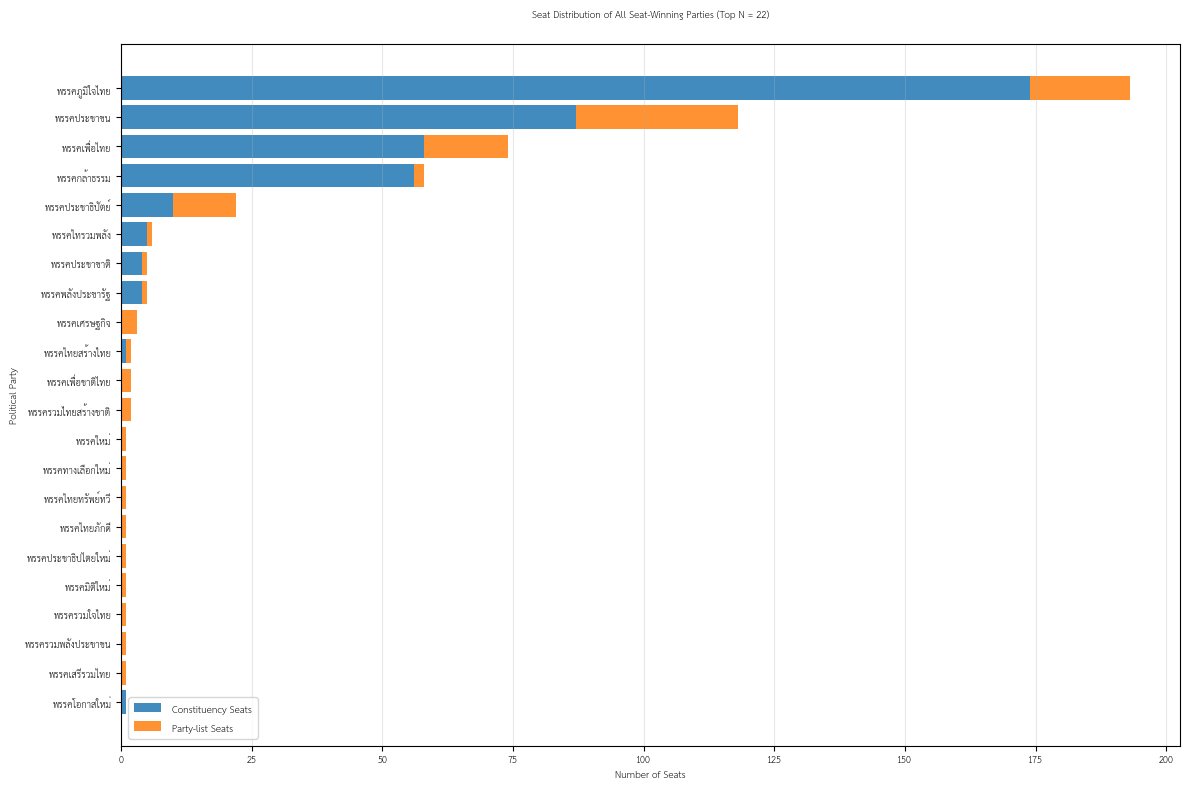

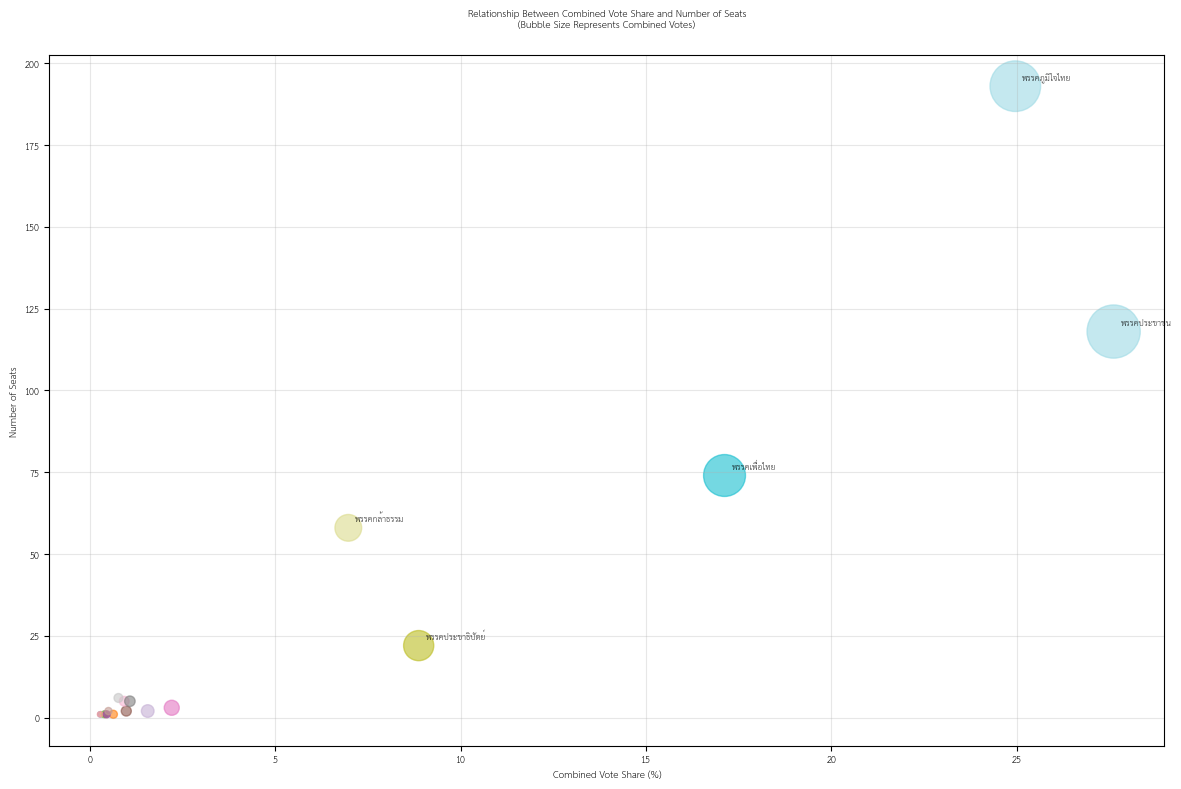

,partyName,combinedVotes,totalSeats,votes_per_seat,vote_share_combined_pct
3,พรรคกล้าธรรม,4449389,58,76713.603448,6.973772
5,พรรคไทรวมพลัง,493742,6,82290.333333,0.773869
0,พรรคภูมิใจไทย,15927763,193,82527.269430,24.964458
7,พรรคพลังประชารัฐ,592925,5,118585.000000,0.929324
6,พรรคประชาชาติ,690286,5,138057.200000,1.081923
2,พรรคเพื่อไทย,10923700,74,147617.567568,17.121315
1,พรรคประชาชน,17619788,118,149320.237288,27.616462
9,พรรคไทยสร้างไทย,321718,2,160859.000000,0.504246
12,พรรคทางเลือกใหม่,175625,1,175625.000000,0.275267
18,พรรครวมพลังประชาชน,183956,1,183956.000000,0.288324


In [20]:
party_with_seats = party_profile[party_profile["totalSeats"] > 0].copy()
party_with_seats = party_with_seats.sort_values("totalSeats", ascending=True)
top_n_seat_winning = len(party_with_seats)

plt.figure(figsize=(12, 8))
plt.barh(
    party_with_seats["partyName"],
    party_with_seats["constituencySeats"],
    label="Constituency Seats",
    alpha=0.85,
)
plt.barh(
    party_with_seats["partyName"],
    party_with_seats["partyListSeats"],
    left=party_with_seats["constituencySeats"],
    label="Party-list Seats",
    alpha=0.85,
)
plt.xlabel("Number of Seats", fontproperties=thai_font)
plt.ylabel("Political Party", fontproperties=thai_font)
plt.title(
    f"Seat Distribution of All Seat-Winning Parties (Top N = {top_n_seat_winning})",
    fontproperties=thai_font,
    pad=20,
)
plt.legend(prop=thai_font)
plt.grid(axis="x", alpha=0.3)
plt.tight_layout()
plt.show()

plt.figure(figsize=(12, 8))
plt.scatter(
    party_with_seats["vote_share_combined_pct"],
    party_with_seats["totalSeats"],
    s=party_with_seats["combinedVotes"] / 12000,
    alpha=0.6,
    c=range(len(party_with_seats)),
    cmap="tab20",
)

for _, row in party_with_seats.iterrows():
    if row["totalSeats"] >= 10:
        plt.annotate(
            row["partyName"],
            (row["vote_share_combined_pct"], row["totalSeats"]),
            xytext=(5, 5),
            textcoords="offset points",
            fontsize=9,
            fontproperties=thai_font,
            alpha=0.85,
        )

plt.xlabel("Combined Vote Share (%)", fontproperties=thai_font)
plt.ylabel("Number of Seats", fontproperties=thai_font)
plt.title(
    "Relationship Between Combined Vote Share and Number of Seats\n(Bubble Size Represents Combined Votes)",
    fontproperties=thai_font,
    pad=20,
)
plt.grid(True, alpha=0.3)
plt.tight_layout()
plt.show()

party_with_seats["votes_per_seat"] = (
    party_with_seats["combinedVotes"] / party_with_seats["totalSeats"]
).replace([float("inf")], pd.NA)

seat_vote_relationship_table = party_with_seats[
    [
        "partyName",
        "combinedVotes",
        "totalSeats",
        "votes_per_seat",
        "vote_share_combined_pct",
    ]
].sort_values("votes_per_seat")
seat_vote_relationship_table.head(15)

In [21]:
top_parties_summary = pd.concat(
    [
        top_by_seats.reset_index(drop=True),
        top_by_const_votes.reset_index(drop=True),
        top_by_partylist_votes.reset_index(drop=True),
        top_by_combined_votes.reset_index(drop=True),
    ],
    axis=1,
    keys=["By seats", "By constituency votes", "By party-list votes", "By combined votes"],
)

top_parties_summary

By seats                           By constituency votes  \
          partyName totalSeats seat_share_pct             partyName   
0     พรรคภูมิใจไทย        193           38.6         พรรคภูมิใจไทย   
1       พรรคประชาชน        118           23.6           พรรคประชาชน   
2      พรรคเพื่อไทย         74           14.8          พรรคเพื่อไทย   
3      พรรคกล้าธรรม         58           11.6          พรรคกล้าธรรม   
4  พรรคประชาธิปัตย์         22            4.4      พรรคประชาธิปัตย์   
5     พรรคไทรวมพลัง          6            1.2      พรรคพลังประชารัฐ   
6     พรรคประชาชาติ          5            1.0          พรรคเศรษฐกิจ   
7  พรรคพลังประชารัฐ          5            1.0         พรรคไทรวมพลัง   
8      พรรคเศรษฐกิจ          3            0.6   พรรครวมไทยสร้างชาติ   
9   พรรคไทยสร้างไทย          2            0.4         พรรคประชาชาติ   

                                               By party-list votes  \
  totalConstituencyVotes vote_share_const_pct            partyName   
0                9973228            31.289433          พรรคประชาชน   
1                7841837            24.602529        พรรคภูมิใจไทย   
2                5776100            18.121605         พรรคเพื่อไทย   
3                3843453            12.058229     พรรคประชาธิปัตย์   
4                2009435             6.304286         พรรคเศรษฐกิจ   
5                 462974             1.452508  พรรครวมไทยสร้างชาติ   
6                 365434             1.146492     พรรคเพื่อชาติไทย   
7                 341328             1.070863         พรรคกล้าธรรม   
8                 292480             0.917610         พรรครวมใจไทย   
9                 288759             0.905936        พรรคประชาชาติ   

                                                  By combined votes  \
  totalPartyListVotes vote_share_partylist_pct            partyName   
0             9777951                30.625341          พรรคประชาชน   
1             5954535                18.650090        พรรคภูมิใจไทย   
2             5147600                16.122703         พรรคเพื่อไทย   
3             3651026                11.435311     พรรคประชาธิปัตย์   
4             1045452                 3.274441         พรรคกล้าธรรม   
5              705035                 2.208227         พรรคเศรษฐกิจ   
6              628493                 1.968491  พรรครวมไทยสร้างชาติ   
7              605936                 1.897841        พรรคประชาชาติ   
8              403671                 1.264331     พรรคเพื่อชาติไทย   
9              401527                 1.257615     พรรคพลังประชารัฐ   

                                         
  combinedVotes vote_share_combined_pct  
0      17619788               27.616462  
1      15927763               24.964458  
2      10923700               17.121315  
3       5660461                8.871952  
4       4449389                6.973772  
5       1410886                2.211359  
6        997515                1.563460  
7        690286                1.081923  
8        628952                0.985791  
9        592925                0.929324

In [22]:
representation_gap = party_profile[
    [
        "partyName",
        "totalSeats",
        "combinedVotes",
        "seat_share_pct",
        "vote_share_combined_pct",
        "vote_share_const_pct",
        "vote_share_partylist_pct",
    ]
].copy()

representation_gap["gap_vs_combined_vote_pct_points"] = (
    representation_gap["seat_share_pct"] - representation_gap["vote_share_combined_pct"]
)
representation_gap["gap_vs_const_vote_pct_points"] = (
    representation_gap["seat_share_pct"] - representation_gap["vote_share_const_pct"]
)
representation_gap["gap_vs_partylist_vote_pct_points"] = (
    representation_gap["seat_share_pct"] - representation_gap["vote_share_partylist_pct"]
)

over_represented = representation_gap.sort_values(
    "gap_vs_combined_vote_pct_points", ascending=False
).head(10)[
    [
        "partyName",
        "seat_share_pct",
        "vote_share_combined_pct",
        "gap_vs_combined_vote_pct_points",
    ]
]

under_represented = representation_gap.sort_values(
    "gap_vs_combined_vote_pct_points", ascending=True
).head(10)[
    [
        "partyName",
        "seat_share_pct",
        "vote_share_combined_pct",
        "gap_vs_combined_vote_pct_points",
    ]
]

over_represented, under_represented

(             partyName  seat_share_pct  vote_share_combined_pct  \
 0        พรรคภูมิใจไทย            38.6                24.964458   
 3         พรรคกล้าธรรม            11.6                 6.973772   
 5        พรรคไทรวมพลัง             1.2                 0.773869   
 7     พรรคพลังประชารัฐ             1.0                 0.929324   
 58     พรรคสัมมาธิปไตย             0.0                 0.000000   
 53       พรรครักษ์ธรรม             0.0                 0.000000   
 51         พรรครวมพลัง             0.0                 0.000000   
 38   พรรคประชาอาสาชาติ             0.0                 0.008520   
 34  พรรคไทยพิทักษ์ธรรม             0.0                 0.010409   
 35       พรรคไทยรวมไทย             0.0                 0.011986   
 
     gap_vs_combined_vote_pct_points  
 0                         13.635542  
 3                          4.626228  
 5                          0.426131  
 7                          0.070676  
 58                         0.000000  
 53             

In [23]:
insight_snapshot = {
    "total_seats": int(seat_total_from_rows),
    "constituency_seats": int(constituency_seats),
    "party_list_seats": int(party_list_seats),
    "constituency_votes_total": int(constituency_votes_total),
    "party_list_votes_total": int(party_list_votes_total),
    "combined_votes_total": int(combined_votes_total),
    "winner_constituency_ballots_total": int(winner_constituency_votes_total),
    "referendum_total_votes": int(referendum_total_votes),
    "winner_votes_median": float(winner_profile["winner_votes"].median()),
    "winner_percent_median": float(winner_profile["winner_percent"].median()),
    "vote_margin_votes_median": float(winner_profile["vote_margin_votes"].median()),
    "vote_margin_pct_points_median": float(winner_profile["vote_margin_pct_points"].median()),
    "partylist_margin_pct_points_median": float(
        partylist_margin_profile["partylist_margin_pct_points"].median()
    ),
}

leaders_snapshot = {
    "top_seat_party": top_by_seats.iloc[0]["partyName"],
    "top_seat_count": int(top_by_seats.iloc[0]["totalSeats"]),
    "top_const_vote_party": top_by_const_votes.iloc[0]["partyName"],
    "top_const_vote_count": int(top_by_const_votes.iloc[0]["totalConstituencyVotes"]),
    "top_partylist_vote_party": top_by_partylist_votes.iloc[0]["partyName"],
    "top_partylist_vote_count": int(top_by_partylist_votes.iloc[0]["totalPartyListVotes"]),
    "top_combined_vote_party": top_by_combined_votes.iloc[0]["partyName"],
    "top_combined_vote_count": int(top_by_combined_votes.iloc[0]["combinedVotes"]),
    "most_over_repr_party": over_represented.iloc[0]["partyName"],
    "most_over_repr_gap": float(over_represented.iloc[0]["gap_vs_combined_vote_pct_points"]),
    "most_under_repr_party": under_represented.iloc[0]["partyName"],
    "most_under_repr_gap": float(under_represented.iloc[0]["gap_vs_combined_vote_pct_points"]),
}

insight_snapshot, leaders_snapshot

({'total_seats': 500,
  'constituency_seats': 400,
  'party_list_seats': 100,
  'constituency_votes_total': 31874109,
  'party_list_votes_total': 31927648,
  'combined_votes_total': 63801757,
  'winner_constituency_ballots_total': 28602136,
  'referendum_total_votes': 33354794,
  'winner_votes_median': 38310.5,
  'winner_percent_median': 47.05,
  'vote_margin_votes_median': 14560.5,
  'vote_margin_pct_points_median': 17.655,
  'partylist_margin_pct_points_median': 13.630443763196435},
 {'top_seat_party': 'พรรคภูมิใจไทย',
  'top_seat_count': 193,
  'top_const_vote_party': 'พรรคภูมิใจไทย',
  'top_const_vote_count': 9973228,
  'top_partylist_vote_party': 'พรรคประชาชน',
  'top_partylist_vote_count': 9777951,
  'top_combined_vote_party': 'พรรคประชาชน',
  'top_combined_vote_count': 17619788,
  'most_over_repr_party': 'พรรคภูมิใจไทย',
  'most_over_repr_gap': 13.635541732808392,
  'most_under_repr_party': 'พรรคประชาธิปัตย์',
  'most_under_repr_gap': -4.4719515984489275})

### Insights

- We have 500 total seats: 400 constituency seats and 100 party-list seats.
- Total constituency votes are 31,874,109 and total party-list votes are 31,927,648, so combined votes are 63,801,757.
- Turnout-related totals show 28,602,136 constituency ballots from `winner.candidates` and 33,354,794 referendum votes from `map.referendums`.
- The median winner got 38,310.5 votes and 47.05% vote share, which means many winners won with less than half of all votes in their constituency.
- The median constituency margin is 14,560.5 votes (17.655 percentage points), while the median party-list top-2 margin is 13.63 percentage points.
- By seats, the top party is พรรคภูมิใจไทย with 193 seats.
- By constituency votes, the top party is พรรคภูมิใจไทย with 9,973,228 votes.
- By party-list votes, the top party is พรรคประชาชน with 9,777,951 votes.
- By combined votes, the top party is พรรคประชาชน with 17,619,788 votes.
- The biggest over-representation (seat share minus combined vote share) is พรรคภูมิใจไทย at +13.64 points, while the biggest under-representation is พรรคประชาธิปัตย์ at -4.47 points.

# Competitiveness analysis

In [33]:
def build_competitiveness_base():
    base = winner_profile[
        ["id", "provinceName", "vote_margin_votes", "vote_margin_pct_points"]
    ].copy()
    base["vote_margin_votes"] = pd.to_numeric(base["vote_margin_votes"], errors="coerce")
    base["vote_margin_pct_points"] = pd.to_numeric(base["vote_margin_pct_points"], errors="coerce")
    base = base.dropna(subset=["vote_margin_pct_points"]).copy()

    winner_lookup_columns = ["id"]
    for column in ["number", "areaNumber", "constituencyName"]:
        if column in dfs["winner"].columns:
            winner_lookup_columns.append(column)

    winner_lookup = dfs["winner"][winner_lookup_columns].copy()
    base = base.merge(winner_lookup, on="id", how="left")
    return base


def classify_competitiveness(margin_pct):
    if margin_pct < 5:
        return "Highly competitive (<5)"
    if margin_pct < 10:
        return "Competitive (5-<10)"
    if margin_pct < 20:
        return "Moderate (10-<20)"
    return "Safe (>=20)"


class_order = [
    "Highly competitive (<5)",
    "Competitive (5-<10)",
    "Moderate (10-<20)",
    "Safe (>=20)",
]

In [34]:
competitiveness_base = build_competitiveness_base()
competitiveness_base["competitiveness_class"] = competitiveness_base[
    "vote_margin_pct_points"
].apply(classify_competitiveness)
competitiveness_base["competitiveness_class"] = pd.Categorical(
    competitiveness_base["competitiveness_class"], categories=class_order, ordered=True
)

class_distribution = (
    competitiveness_base["competitiveness_class"]
    .value_counts(dropna=False)
    .reindex(class_order, fill_value=0)
    .rename_axis("competitiveness_class")
    .reset_index(name="constituencies")
)
class_distribution["share_pct"] = (
    class_distribution["constituencies"] / class_distribution["constituencies"].sum() * 100
).round(2)

class_distribution

,competitiveness_class,constituencies,share_pct
0,Highly competitive (<5),54,13.50
1,Competitive (5-<10),60,15.00
2,Moderate (10-<20),101,25.25
3,Safe (>=20),185,46.25


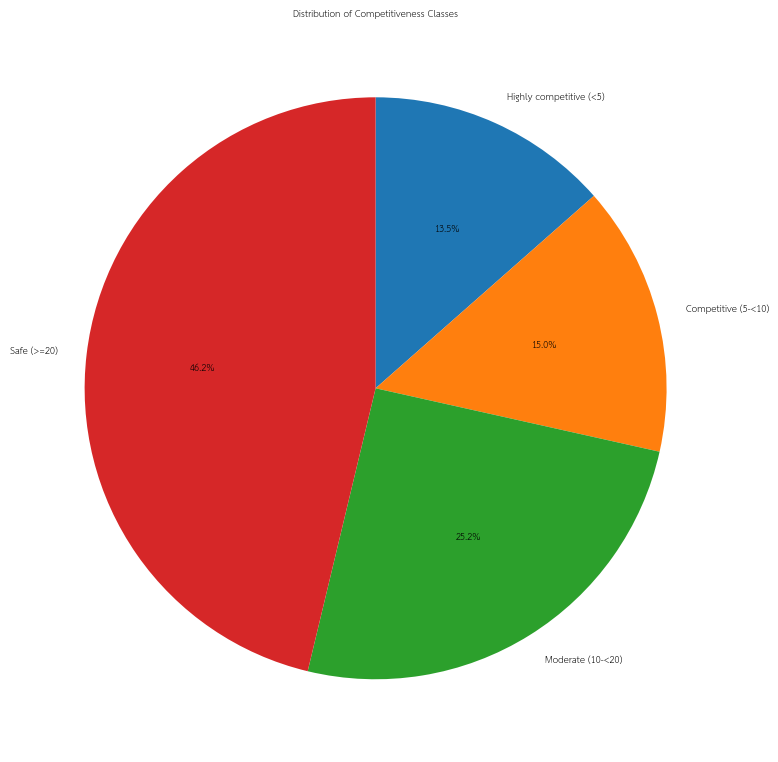

In [35]:
competitiveness_base = build_competitiveness_base()
competitiveness_base["competitiveness_class"] = competitiveness_base[
    "vote_margin_pct_points"
].apply(classify_competitiveness)
competitiveness_base["competitiveness_class"] = pd.Categorical(
    competitiveness_base["competitiveness_class"], categories=class_order, ordered=True
)

class_distribution = (
    competitiveness_base["competitiveness_class"]
    .value_counts(dropna=False)
    .reindex(class_order, fill_value=0)
    .rename_axis("competitiveness_class")
    .reset_index(name="constituencies")
)

plt.figure(figsize=(8, 8))
plt.pie(
    class_distribution["constituencies"],
    labels=class_distribution["competitiveness_class"],
    autopct="%1.1f%%",
    startangle=90,
    counterclock=False,
)
plt.title("Distribution of Competitiveness Classes", fontproperties=thai_font)
plt.tight_layout()
plt.show()

In [36]:
competitiveness_base = build_competitiveness_base()
competitiveness_base["competitiveness_class"] = competitiveness_base[
    "vote_margin_pct_points"
].apply(classify_competitiveness)

race_columns = ["id", "provinceName"]
for column in ["number", "areaNumber", "constituencyName"]:
    if column in competitiveness_base.columns:
        race_columns.append(column)
race_columns.extend(["vote_margin_votes", "vote_margin_pct_points", "competitiveness_class"])

closest_races = competitiveness_base.sort_values("vote_margin_pct_points", ascending=True).head(10)[
    race_columns
]
closest_races

,id,provinceName,number,vote_margin_votes,vote_margin_pct_points,competitiveness_class
397,88885a3d-1f44-438a-8219-0b4c0f2abaf3,นราธิวาส,3,113.0,0.14,Highly competitive (<5)
145,5c131e8f-ae43-4d1e-8e8b-22f24a5359a3,ศรีสะเกษ,6,216.0,0.32,Highly competitive (<5)
275,183a5607-03e3-492d-83c0-7975e8762968,แม่ฮ่องสอน,2,287.0,0.45,Highly competitive (<5)
108,a14de92a-594b-4f43-8fa1-8c81420a8cbe,นครราชสีมา,3,530.0,0.61,Highly competitive (<5)
180,aafb27ff-4787-4e42-ba60-3a6b81ee6532,ขอนแก่น,3,611.0,0.79,Highly competitive (<5)
195,e230711a-bf99-4230-a4c4-dfd7f139530b,อุดรธานี,7,516.0,0.83,Highly competitive (<5)
215,bef35884-c43a-4645-8c94-ca653f70eb90,ร้อยเอ็ด,4,679.0,0.88,Highly competitive (<5)
71,8e589596-9e6c-40ce-89f9-fff854591eab,สระบุรี,1,850.0,1.04,Highly competitive (<5)
295,2055049c-e8be-4649-8888-a10b27399391,พิษณุโลก,1,888.0,1.05,Highly competitive (<5)
329,378416c4-e0ce-4ef7-b2e9-b56ce8166a64,นครปฐม,6,895.0,1.06,Highly competitive (<5)


In [37]:
competitiveness_base = build_competitiveness_base()
competitiveness_base["competitiveness_class"] = competitiveness_base[
    "vote_margin_pct_points"
].apply(classify_competitiveness)

race_columns = ["id", "provinceName"]
for column in ["number", "areaNumber", "constituencyName"]:
    if column in competitiveness_base.columns:
        race_columns.append(column)
race_columns.extend(["vote_margin_votes", "vote_margin_pct_points", "competitiveness_class"])

safest_races = competitiveness_base.sort_values("vote_margin_pct_points", ascending=False).head(10)[
    race_columns
]
safest_races

,id,provinceName,number,vote_margin_votes,vote_margin_pct_points,competitiveness_class
130,e049be80-65c4-43c1-ad65-652b0ed25177,บุรีรัมย์,9,44408.0,71.61,Safe (>=20)
124,ae05d898-1f46-4d82-8d4e-aa266a3551f9,บุรีรัมย์,3,44523.0,69.97,Safe (>=20)
131,219c59a4-6a87-44cb-aae1-a1fbc3bc2b02,บุรีรัมย์,10,41527.0,68.61,Safe (>=20)
158,a33be955-f6c4-47ae-9a55-cd4afe07d5b5,อุบลราชธานี,10,52359.0,67.91,Safe (>=20)
147,155bfdce-709e-438b-ba1c-d7e26ec3053f,ศรีสะเกษ,8,44432.0,61.83,Safe (>=20)
337,f4a4d77f-1abf-478f-8d5f-73f4563b9a73,เพชรบุรี,3,54615.0,61.60,Safe (>=20)
264,b8e51dc9-999a-4ee0-a967-5b0c2be092c2,พะเยา,1,48578.0,61.15,Safe (>=20)
127,cdaeee2b-1f46-43ad-95fa-5a706e9dbadc,บุรีรัมย์,6,38638.0,60.08,Safe (>=20)
122,aae90b72-fb34-43dc-adac-13b00541a1a4,บุรีรัมย์,1,41799.0,59.33,Safe (>=20)
63,ca4a85d3-c43d-45d2-93e3-bd97f831fbfa,อ่างทอง,2,44122.0,58.27,Safe (>=20)


In [38]:
competitiveness_base = build_competitiveness_base()

valid_n = len(competitiveness_base)
small_margin_summary = pd.DataFrame(
    [
        {
            "threshold": "<5 pct points",
            "constituencies": int((competitiveness_base["vote_margin_pct_points"] < 5).sum()),
            "denominator_valid_constituencies": int(valid_n),
        },
        {
            "threshold": "<10 pct points",
            "constituencies": int((competitiveness_base["vote_margin_pct_points"] < 10).sum()),
            "denominator_valid_constituencies": int(valid_n),
        },
    ]
)
small_margin_summary["share_pct"] = (
    small_margin_summary["constituencies"]
    / small_margin_summary["denominator_valid_constituencies"]
    * 100
).round(2)

small_margin_summary

,threshold,constituencies,denominator_valid_constituencies,share_pct
0,<5 pct points,54,400,13.5
1,<10 pct points,114,400,28.5


In [39]:
competitiveness_base = build_competitiveness_base()

province_margin_summary = (
    competitiveness_base.groupby("provinceName", dropna=False)["vote_margin_pct_points"]
    .agg(
        constituencies="count",
        avg_margin_pct_points="mean",
        variance_margin_pct_points="var",
        std_margin_pct_points="std",
    )
    .reset_index()
    .sort_values("avg_margin_pct_points", ascending=True)
)

province_margin_summary

,provinceName,constituencies,avg_margin_pct_points,variance_margin_pct_points,std_margin_pct_points
36,ภูเก็ต,3,7.290000,34.809600,5.899966
6,จันทบุรี,3,7.390000,30.410800,5.514599
15,นครนายก,2,8.160000,1.411200,1.187939
23,น่าน,3,8.450000,1.775100,1.332329
59,สุราษฎร์ธานี,7,9.505714,42.800462,6.542206
...,...,...,...,...,...
69,อ่างทอง,2,52.980000,55.968200,7.481190
41,ระนอง,1,53.920000,NaN,NaN
72,เพชรบุรี,3,54.616667,38.605833,6.213359
67,อุทัยธานี,2,56.425000,0.781250,0.883883


### Insights

- Most constituencies are in the Safe class (46.25%), so many races were not close.
- Close races still matter: 13.5% of constituencies were decided by less than 5 percentage points.
- If we use a wider cutoff, 28.5% were decided by less than 10 percentage points.
- The closest race had a margin of 0.14 percentage points, while the safest race had 71.61 percentage points.
- Province patterns are different: average margins are low in some provinces (for example, Phuket at about 7.29) but very high in others (for example, Buriram at about 58.96).